
# Принятие решений в бизнесе

## Описание данных

### Данные для первой части

Файл /datasets/hypothesis.csv. Скачать датасет

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv. Скачать датасет

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### Цели проекта:
1.Приоритизируйте гипотезы

2.Запустите A/B-тест

3.Проанализируйте результаты


### Задачи проекта:
1.Проверьте выбросы и аномалии

2.Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

3.Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

4.Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Проанализируйте A/B-тест:

5.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

6.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

7.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

8.Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.

9.Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.

10.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

11.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

12.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

13.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

14.Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.

15.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

16.Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.

17.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

18.Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_colwidth = 100

In [2]:
data = pd.read_csv('hypothesis.csv', sep=',')
display(data.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
data.columns = data.columns.str.lower()
display(data.head())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Применить фреймворк ICE для приоритизации гипотез. 

In [5]:
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'], 2)
display(data)

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20


Применить фреймворк RICE для приоритизации гипотез. 

In [6]:
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']
display(data.sort_values('RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Приоритизация  гипотез изменилась из-за добавления параметра в расчет Reach. Выходит, что больше пользователей затронет гипотеза которая в расчете Rice первая.

In [7]:
orders = pd.read_csv('orders.csv', sep=',')
orders['date'] =  pd.to_datetime(orders['date'])


visitors = pd.read_csv('visitors.csv', sep=',')
visitors['date'] =  pd.to_datetime(visitors['date'])


In [8]:
print('Время начала проведения теста:',orders['date'].min())
print('Время окончания проведения теста:', orders['date'].max())
print('Количество групп в тесте: {}, уникальные группы: {}'.format(orders['group'].nunique(), orders['group'].unique()))
print('Количество пользователей в группе B равно :',orders[orders['group']=='B']['group'].count())
print('Количество пользователей в группе A равно :', orders[orders['group']=='A']['group'].count())   

Время начала проведения теста: 2019-08-01 00:00:00
Время окончания проведения теста: 2019-08-31 00:00:00
Количество групп в тесте: 2, уникальные группы: ['B' 'A']
Количество пользователей в группе B равно : 640
Количество пользователей в группе A равно : 557


Количество групп в тесте равно: 2

Значит, тест парный.

Проверить пересечение пользователей группы А и B по визитам.

In [9]:
user_intersection = orders.groupby('visitorId').agg({'group':'nunique'})
user_intersection = user_intersection[user_intersection['group'] == 2].count()
print('Количество пересечений группы А и Б по визитам равно:',user_intersection['group'])

Количество пересечений группы А и Б по визитам равно: 58


Проверить пропущенные значения.

In [10]:
print(orders.isnull().sum())
print(visitors.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


#Проверить дубликаты.

In [11]:
print('Количество дубликатов в заказах равно:',orders.duplicated().sum(), '\n',
'Количество дубликатов в визитах равно:',visitors.duplicated().sum())

Количество дубликатов в заказах равно: 0 
 Количество дубликатов в визитах равно: 0


Убрать дубликаты по группам.

In [12]:
df_a = orders.query('group == "A"')
df_b = orders.query('group == "B"')


df_a['visitorId'].drop_duplicates(),
df_b['visitorId'].drop_duplicates()

0       3312258926
1       3642806036
3       1196621759
4       2322279887
5        935554773
           ...    
1186    2146711261
1190    1197745035
1191     608641596
1192    3733762160
1196    2108080724
Name: visitorId, Length: 586, dtype: int64

Построить график кумулятивной выручки по группам.

In [13]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x : orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' :'max',
         'group': 'max',
          'transactionId':'nunique',
         'visitorId': 'nunique',
        'revenue': 'sum'})
    , axis = 1
).sort_values(by =['date', 'group'])

visitorsAggregated =  datesGroups.apply(
    lambda x : visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' :'max',
         'group': 'max',
        'visitors': 'sum'})
    , axis = 1
).sort_values(by = ['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date','group'], right_on = ['date','group'])
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

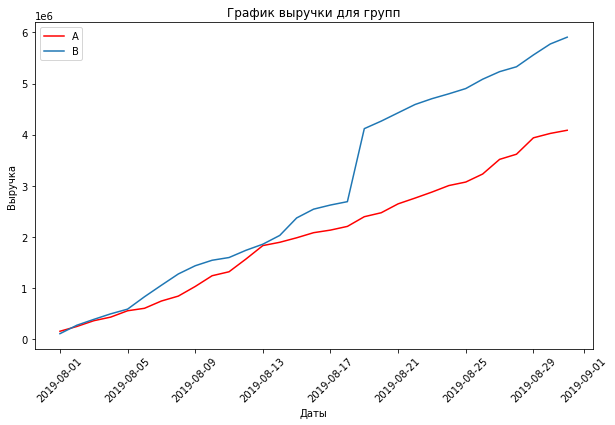

In [14]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date','orders','revenue']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date','orders','revenue']]


plt.figure(figsize=(10,6))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',color= 'red')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation = 45)
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.title('График выручки для групп')
plt.legend();

Построить график кумулятивного среднего чека по группам.

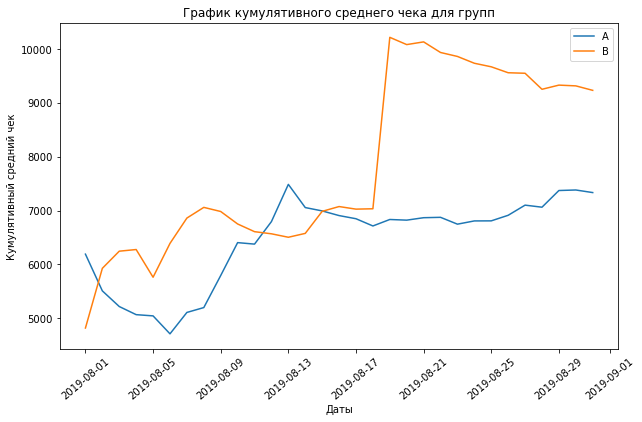

In [15]:
plt.figure(figsize=(10,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel("Даты")
plt.ylabel("Кумулятивный средний чек")
plt.xticks(rotation = 40)
plt.title('График кумулятивного среднего чека для групп')
plt.legend();

Средний чек группы В резко вырос в определенный момент, возможно, какой удачный маркетинговый ход. Результат которого сохранился и дальше.

Построить график относительного изменения кумулятивного среднего чека группы B к группе A.

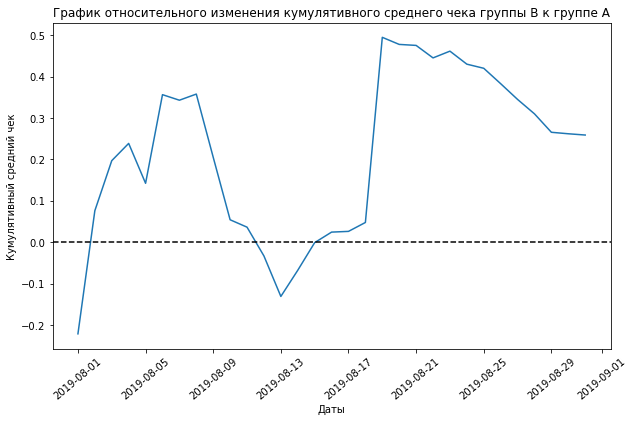

In [16]:
plt.figure(figsize = (10,6))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',\
                                                   suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / \
                                           mergedCumulativeRevenue['ordersB']) / \
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA']) - 1)
plt.axhline(y = 0, color = 'black', linestyle = '--') 
plt.xlabel("Даты")
plt.ylabel("Кумулятивный средний чек")
plt.xticks(rotation = 40)
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А');

Возможно в несколько из этих дат были совершенены аномальные заказы.


Построить график кумулятивной конверсии по дням по группам.

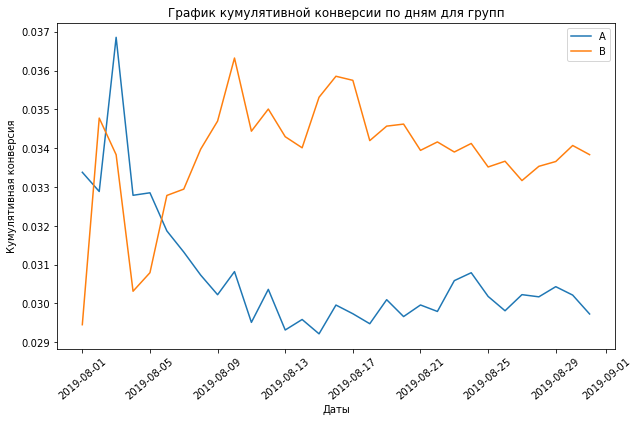

In [17]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
plt.figure(figsize=(10,6))
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel("Даты")
plt.ylabel("Кумулятивная конверсия")
plt.xticks(rotation = 40)
plt.title('График кумулятивной конверсии по дням для групп')
plt.legend();

Вначале теста сегмент А имел большую конверсию , чем сегмент В, но скоро конверсия сегмента В увеличилась и закрепилась,и стала выше чем конверсия сегмента А.


Построить график относительного различия кумулятивной конверсии группы B к группе A.

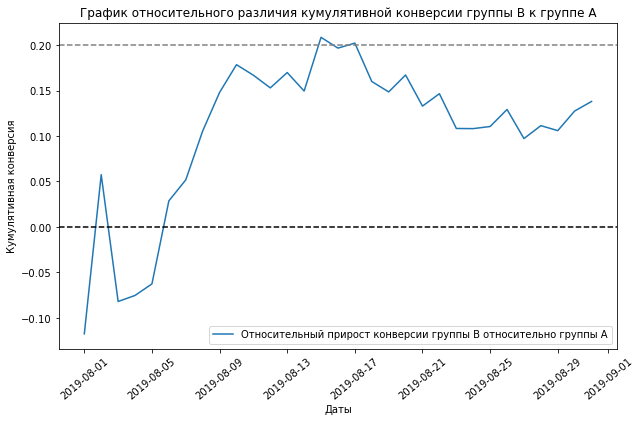

In [18]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],\
                                                            left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/ \
         mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.xticks(rotation = 40)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.xlabel("Даты")
plt.ylabel("Кумулятивная конверсия")
plt.title('График относительного различия кумулятивной конверсии группы В к группе А');

Группа сегмента B лидирует по конверсии относительно группы А. Она зафиксировалась в 15 процентах выше чем группа сегмента А.

Построить гистограмму распределения числа заказов по пользователям методом.

          userId  orders
1030  4283872382       1
1029  4281247801       1
1028  4279090005       1
1027  4278982564       1
1026  4266935830       2
1025  4259830713       1
1024  4258103007       1
1023  4256040402      11
1022  4251115836       1
1021  4251087345       1


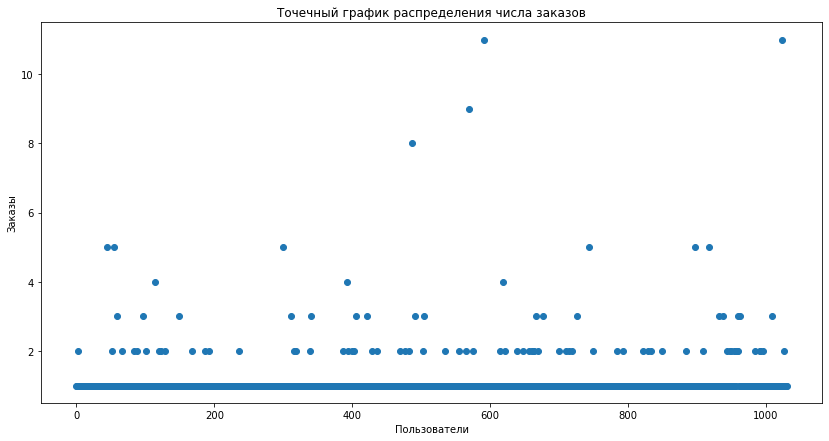

In [19]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
plt.figure(figsize=(14,7))
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='userId', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Точечный график распределения числа заказов')
plt.xlabel("Пользователи")
plt.ylabel("Заказы");

Пользователей заказавших более пяти раз совсем мало, что может быть показателем их аномальности.

Посчитать 95-й и 99-й перцентили количества заказов на пользователя.

In [20]:
data_orders = np.array(ordersByUsers['orders'])
print('перцентиль 95-й равен:',int(np.percentile(data_orders, 95))) 
print('перцентиль 99-й равен:',int(np.percentile(data_orders, 99))) 

перцентиль 95-й равен: 2
перцентиль 99-й равен: 4


5 Процентов данных заказов содержит 2 заказа. 1 Процент данных заказов содержит 4 заказа. Итого аномальными можно считать 3-4 заказа, потому что они являются выбивающимися значениями из выборки по заказам.

Построить точечный график стоимостей заказов.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


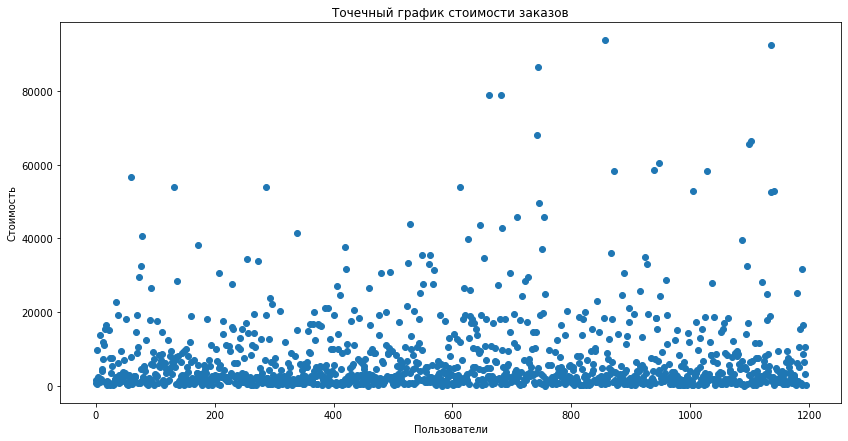

In [21]:
plt.figure(figsize=(14,7))
print(orders.sort_values(by='revenue', ascending=False).head(10))
#удалить аномальные значения
data = orders.loc[orders['revenue']<202739]
x_values = pd.Series(range(0, len(data['revenue'])))
#визуализировать без аномальных значений
plt.scatter(x_values, data['revenue']) 
plt.xlabel("Пользователи")
plt.ylabel("Стоимость")
plt.title('Точечный график стоимости заказов');

Заказов выше стоимости 68 000 очень мало, самыми аномальными можно назвать два первых заказа стоимостями : 1294500 и    202740     рублей.

Посчитать 95-й и 99-й выборочные перцентили выручки с заказов по пользователям.

In [22]:
data_revenue = np.array(orders['revenue'])
print('перцентиль 95-й равен:' ,int(np.percentile(data_revenue, 95))) 
print('перцентиль 99-й равен:' ,int(np.percentile(data_revenue, 99))) 

перцентиль 95-й равен: 28000
перцентиль 99-й равен: 58233


5 Процентов данных выручки содержит стоимости 28 000 едениц. 1 Процент данных заказов содержит стоимости 58233 еденицы. Итого аномальными можно считать заказы стоимостью выше 28000, потому что они являются выбивающимися значениями из выборки по выручке для заказов.

### Сформулировать гипотезы.

`Нулевая гипотеза`: наличие статистически значимых отличий в конверсии между группами в "сырых" данных.

`Альтернативная гипотеза`: отсуствие статистически значимых отличий в конверсии между группами в "сырых" данных.

Уровень значимости для проверки гипотез α=0,05

Для проверки гипотез используем непараметрический критерий Манна-Уитни, так как данные распределены ненормально и имеют выбросы в виде аномально высоких стоимостей заказов и количества заказов.

In [23]:

#Посчитать статистическую значимость различий количества заказов между группами по «сырым» данным
#сгруппировать визиты по уникальным юзерам для группы А

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

#сгруппировать визиты по уникальным юзерам для группы В
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

#разделить визиты по группам
visitors_a = visitors[visitors['group'] == 'A']
visitors_b = visitors[visitors['group'] == 'B']

#подсчитать для каждого визита количество заказов для группы А


sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#подсчитать для каждого визита количество заказов для группы В
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#посчитать p-value
print('p-value равен: '"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

#посчитать относительный прирост среднего группы B к конверсии группы А
print('относительный прирост среднего группы B к конверсии группы А :'
      ,"{0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))


p-value равен: 0.01679
относительный прирост среднего группы B к конверсии группы А : 13.808%


P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Относительный прирост среднего группы В к конверсии группы А равен 13 процентов.

`Нулевая гипотеза:` о наличии статистически значимых отличий в среднем чеке в "сырых" данных.

`Альтернативная гипотеза:` об отсутстивии  статистически значимых отличий в среднем чеке в "сырых" данных.

In [24]:
#Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
#Посчитать p-value 
print('p_value равен:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],\
                                                           orders[orders['group']=='B']['revenue'])[1]))

#посчитать относительный прирост среднего чека группы B
print('относительный прирост среднего чека группы В равен:'
    '{0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

#Провести тест на точность исследования
results =stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],orders[orders['group']=='B']['revenue'],True, 'less') 



p_value равен: 0.729
относительный прирост среднего чека группы В равен:25.871%


P-value больше 0.05, статистически значимые отличия в среднем чеке между группами не имеются. Относительное различие между чеками 26 процентов.

Подсчитать абсолютные и относительные потери пользователей.

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >  np.percentile(2, 95) ]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(2, 95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(28000, 95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


print('Абсолютные потери пользователей: {}'.format(len(abnormalUsers)))
print('Относительные потери пользователей: {:.2%}'.format(len(abnormalUsers) / orders['visitorId'].nunique()))

Абсолютные потери пользователей: 74
Относительные потери пользователей: 7.18%


`Нулевая гипотеза:` наличие статистически значимых отличий в конверсии между группами в "очищенных" данных.

`Альтернативная гипотеза:` отсуствие статистически значимых отличий в конверсии между группами в "очищенных" данных.

In [26]:
#Посчитать статистическую значимость различий количества заказов между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p_value равен: ','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительный прирост среднего группы B к конверсии группы А равен:',\
      '{0:.3%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 



p_value равен:  0.00887
относительный прирост среднего группы B к конверсии группы А равен: 18.396%


P-value меньше 0.05 процентов, поэтому нулевую гипотезу мы можем отвергнуть. Относительный прирост среднего группы В к конверсии группы А равен 18 процентов.

`Нулевая гипотеза:` о наличии статистически значимых отличий в среднем чеке в "очищенных" данных.

`Альтернативная гипотеза:` об отсутстивии  статистически значимых отличий в среднем чеке в "очищенных" данных.

In [27]:
#Посчитать статистическую значимость различий в среднем чеке по «очищенным» данным
print('p-value равен:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['transactionId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['transactionId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B равен:',
    "{0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['transactionId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['transactionId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value равен: 0.729
Относительный прирост среднего чека очищенной группы B равен: 25.871%


P-value выше 0.05, поэтому нулевую гипотезу можем отвергнуть. Относительное различие между чеками 26 процентов.

Написать вывод.

Принять решение по результатам теста и объяснить его. 
Вариант решения к которому мы пришли - это остановить тест, зафиксировать победу одной из групп. По "сырым" данным и "очищенным" данным средний чек лидирует у группы В, по "сырым" данным и "очищенным" данным количества заказов мы можем отвергнуть нулевую гипотезу. У нас также идет прирост относительного показателя для группы В, который устаканивается после очистки данных с 13 до 18, что также говорит о достоверности исследований , после того, как мы убрали аномальные значения. Поэтому мы можем сказать что лидером можно считать группу В, и на этом тест можно остановить, потому что дальнейшие исследования не будут играть роли для установления этого факта. 